In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
data = pd.read_csv('AEO.csv', encoding='cp949')
print(data)

         승인번호        승인일자 업종구분명                   업체명
0    제720053호  2015-12-23   판매업             인동농협하나로마트
1    제710114호  2015-12-22   음식점  대구축산농협 팔공상강한우프라자 서재점
2    제710123호  2015-12-22   음식점                 성심유치원
3    제130014호  2015-06-19   가공업               (주)한성식품
4        옥천-1  2015-04-22   판매업                  옥천농협
..        ...         ...   ...                   ...
336      안동-5  2005-08-30   판매업            안동봉화축협송현지점
337      청도-2  2005-08-30   판매업             산서농협하나로마트
338      충주-1  2005-08-30   판매업              신세계마트충주점
339      충주-2  2005-08-30   판매업         롯데쇼핑㈜ 롯데마트충주점
340      함안-1  2005-08-29   판매업            함안축협 하나로마트

[341 rows x 4 columns]


In [3]:
year_data = pd.DataFrame(data['승인일자'])
for i in range(len(year_data['승인일자'])):
    year_data['승인일자'][i] = year_data['승인일자'][i][:4]

year_data['count'] = 1
year_data = year_data.groupby('승인일자').sum()
print(year_data)
print(year_data['count'].max(), year_data['count'].min())

      count
승인일자       
2005     69
2006     22
2007     38
2008     20
2010     33
2011     30
2012     98
2013      8
2014     14
2015      9
98 8


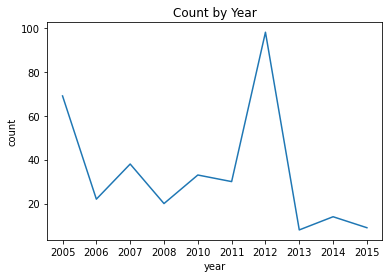

In [4]:
import matplotlib.pyplot as plt
plt.plot(year_data)
plt.title('Count by Year')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

In [5]:
city_data = pd.DataFrame(data['승인번호'])
for i in range(len(city_data)):
    city_data['승인번호'][i] = city_data['승인번호'][i][:2]

city_data['count'] = 1
city_data = city_data.groupby('승인번호').sum()
city_data.drop(index=['12', '81', '82', '제1', '제3', '제7', '제8'], inplace=True)
print(city_data.head())

      count
승인번호       
강화        3
거창        3
고령        1
고양        9
구미        7


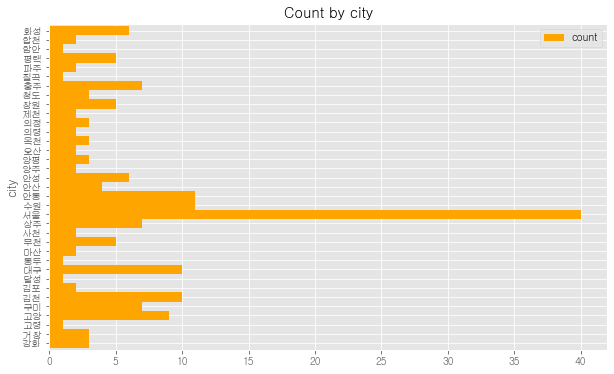

In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.style.use('ggplot')
city_data.plot(kind='barh', color='orange', width=1, figsize=(10, 6))
plt.title('Count by city')
plt.ylabel('city')
plt.show()

In [7]:
genre_data = pd.DataFrame(data['업종구분명'])
genre_data['count'] = 1
genre_data = genre_data.groupby('업종구분명').sum()
print(genre_data)

       count
업종구분명       
가공업       17
음식점       85
판매업      239


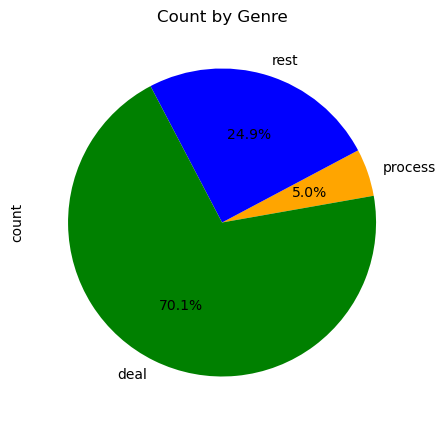

In [8]:
import matplotlib.pyplot as plt
plt.style.use('default')

genre_data.index = [ 'process', 'rest', 'deal']
genre_data['count'].plot(kind='pie',
                        figsize=(7, 5),
                        autopct='%1.1f%%',
                        startangle=10,
                        colors=['orange', 'blue', 'green']
                        )
plt.title('Count by Genre')
plt.show()